# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import time
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

# User Inputs

* **ID** = TIC ID of selected target  
* **sectors** = Observational sector of TESS  


* **period** = Orbital Period  
* **tdepth** = Transit Depth  


* **lc** = Light curve file  
* **contrastcurve_file** = Contrast curve file  


* **band** = Band of filter through which CC file was created. (TESS, Vis, J, H, K)  
From table below we can identify which band to choose.  

|   Wavelength   | Central Wavelength | Filter |
|:--------------:|:------------------:|:------:|
|  600 - 1000 nm | 786.5 nm           |  TESS  |
|   400 - 800 nm | 550 nm             |   Vis  |
| 1000 - 1500 nm | 1250 nm            |   J    |
| 1400 - 2000 nm | 1650 nm            |   H    |
| 1800 - 2600 nm | 2200 nm            |   K    |

* We usually encounter with following wavelengths,  
 - **562 nm** : Vis filter  
 - **832 nm** : TESS filter  
 - **Br-Gamma** (2172 - 2202 nm) : K filter
 - **Jcont** (1190 - 1230 nm) : J filter

# I/P

* *Use these values for input*  

  - **Sector 26:**  
Period = 9.2292139391    
tdepth = 0.0351918770**2
   
  - **Sector 40:**  
Period = 9.2291941858  
tdepth = 0.0379084178**2

  - **Sector 52:**  
Period = 9.2291894452  
tdepth = 0.0349359284**2
   
  - **Sector 53:**  
Period = 9.2292385534   
tdepth = 0.0352644518**2

  - **Sector 54:**  
Period = 9.2291840732  
tdepth = 0.0349845702**2

In [4]:
ID = 75878355
sectors = np.array([26])

period = 9.2292139391
tdepth = 0.0351918770**2

lc = pd.read_csv("TOI_2134_26.csv", header=None)
contrastcurve_file = "Palomar_5m_K.csv"

band = 'K'

# Downloading & Visualizing Data

In [3]:
target = tr.target(ID=ID, sectors=sectors)

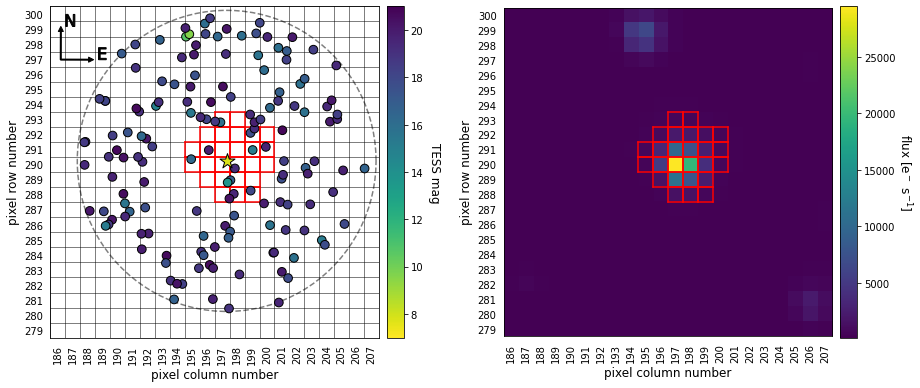

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,75878355,7.7945,6.776,6.247,6.091,271.935200,39.074146,0.69,0.769698,4406.0,44.179300,0.000,0.000
1,1688057187,19.2817,NaN,NaN,NaN,271.939190,39.071344,NaN,NaN,NaN,0.958552,15.036,132.129
2,75878350,16.8716,16.043,15.565,14.328,271.936910,39.067034,1.07,0.813739,5892.0,0.278635,26.043,169.427
3,1688057347,19.8077,NaN,NaN,NaN,271.926455,39.078181,NaN,NaN,NaN,-0.019464,28.431,300.730
4,1688057189,13.7586,NaN,NaN,NaN,271.935509,39.066184,1.25,1.550720,6331.0,0.679905,28.675,178.275
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,1688057209,19.3757,NaN,NaN,NaN,271.990280,39.108820,NaN,NaN,NaN,0.493836,198.159,50.937
147,75878387,18.1561,16.565,15.845,15.293,271.891022,39.117330,0.56,0.822886,3727.0,0.384613,198.503,321.566
148,1688057086,19.5153,NaN,NaN,NaN,271.959731,39.021812,NaN,NaN,3797.0,1.031910,200.496,159.989
149,1688057263,20.0745,NaN,NaN,NaN,271.867084,39.056271,NaN,NaN,NaN,NaN,200.975,251.347


In [5]:
ap = np.array([[197, 288], [198, 288], [199, 288], [196, 289], 
               [197, 289], [198, 289], [199, 289], [195, 290], 
               [196, 290], [197, 290], [198, 290], [199, 290], 
               [200, 290], [195, 291], [196, 291], [197, 291], 
               [198, 291], [199, 291], [200, 291], [196, 292], 
               [197, 292], [198, 292], [199, 292], [200, 292], 
               [197, 293], [198, 293]])

target.plot_field(sector = sectors[0], ap_pixels = ap)
 
target.stars

# Check Nearby Region

In [6]:
apertures = np.array([ap])
target.calc_depths(tdepth = tdepth, all_ap_pixels = apertures)

target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,75878355,7.7945,6.776,6.247,6.091,271.935200,39.074146,0.69,0.769698,4406.0,44.179300,0.000,0.000,9.939410e-01,0.001246
1,1688057187,19.2817,NaN,NaN,NaN,271.939190,39.071344,NaN,NaN,NaN,0.958552,15.036,132.129,2.513720e-05,0.000000
2,75878350,16.8716,16.043,15.565,14.328,271.936910,39.067034,1.07,0.813739,5892.0,0.278635,26.043,169.427,2.216881e-04,0.000000
3,1688057347,19.8077,NaN,NaN,NaN,271.926455,39.078181,NaN,NaN,NaN,-0.019464,28.431,300.730,1.442163e-05,0.000000
4,1688057189,13.7586,NaN,NaN,NaN,271.935509,39.066184,1.25,1.550720,6331.0,0.679905,28.675,178.275,3.764412e-03,0.328994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,1688057209,19.3757,NaN,NaN,NaN,271.990280,39.108820,NaN,NaN,NaN,0.493836,198.159,50.937,1.070039e-20,0.000000
147,75878387,18.1561,16.565,15.845,15.293,271.891022,39.117330,0.56,0.822886,3727.0,0.384613,198.503,321.566,1.111311e-25,0.000000
148,1688057086,19.5153,NaN,NaN,NaN,271.959731,39.021812,NaN,NaN,3797.0,1.031910,200.496,159.989,2.713150e-25,0.000000
149,1688057263,20.0745,NaN,NaN,NaN,271.867084,39.056271,NaN,NaN,NaN,NaN,200.975,251.347,3.856254e-26,0.000000


In [7]:
for i in range (1, np.size(target.stars['ID'])):
    if target.stars['tdepth'][i] !=0:
        print(target.stars['ID'][i])

1688057189


# Ploting CC File

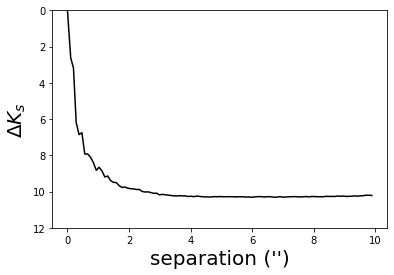

In [10]:
cc = pd.read_csv(contrastcurve_file, header=None)
sep, dmag = cc[0].values, cc[1].values

plt.plot(sep, dmag, 'k-');
plt.ylim(12,0);
plt.ylabel("$\\Delta K_s$", fontsize=20);
plt.xlabel("separation ('')", fontsize=20);

# Calculating FPP & NFPP

In [11]:
%%time
# read in the light curve
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

#lc_binsize = (time.max()-time.min())/100
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err)#.bin(time_bin_size=lc_binsize)

target.calc_probs(time = lc.time.value, 
                  flux_0 = lc.flux.value, 
                  flux_err_0 = np.mean(lc.flux_err.value), 
                  P_orb = P_orb,
                  contrast_curve_file = contrastcurve_file,
                  filt = band,
                  exptime = 0.0013888888888889)

Calculating TP scenario probabilitiey for 75878355.
Calculating EB and EBx2P scenario probabilities for 75878355.
Calculating PTP scenario probability for 75878355.
Calculating PEB and PEBx2P scenario probabilities for 75878355.
Calculating STP scenario probability for 75878355.
Calculating SEB and SEBx2P scenario probabilities for 75878355.
Calculating DTP scenario probability for 75878355.
Calculating DEB and DEBx2P scenario probabilities for 75878355.
Calculating BTP scenario probability for 75878355.
Calculating BEB and BEBx2P scenario probabilities for 75878355.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 1688057189.
Wall time: 15min 31s


In [12]:
df_results = target.probs
print("FPP = ", target.FPP)
print("NFPP = ", target.NFPP)
df_results

FPP =  1.1657341758564144e-13
NFPP =  9.682760619159368e-64


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,75878355,TP,0.690000,0.769698,9.229214,89.669319,0.152706,0.277436,291.332916,2.964551,0.000000,0.000000,8.601690e-01
1,75878355,EB,0.690000,0.769698,9.229214,85.211433,1.663900,0.282290,50.228805,0.000000,0.625230,0.600558,0.000000e+00
2,75878355,EBx2P,0.690000,0.769698,18.458428,88.434831,0.689542,0.706986,193.036220,0.000000,0.681150,0.710126,3.390170e-49
3,75878355,PTP,0.690000,0.769698,9.229214,88.648946,0.600511,0.198443,267.332920,3.140265,0.000000,0.000000,1.244855e-03
4,75878355,PEB,0.690000,0.769698,9.229214,84.559059,1.375477,0.456221,77.145079,0.000000,0.641815,0.663452,0.000000e+00
5,75878355,PEBx2P,0.690000,0.769698,18.458428,88.447566,0.759541,0.646449,191.117542,0.000000,0.655690,0.680307,4.138630e-116
6,75878355,STP,0.686889,0.716563,9.229214,89.591922,0.150893,0.089126,49.325479,3.937459,0.000000,0.000000,2.615237e-139
7,75878355,SEB,0.190138,0.220958,9.229214,89.246142,0.181965,0.820220,165.735732,0.000000,0.032709,0.100000,5.775257e-89
8,75878355,SEBx2P,0.126586,0.155067,18.458428,89.649852,0.542235,0.636641,198.101992,0.000000,0.125186,0.153364,1.881786e-75
9,75878355,DTP,0.690000,0.769698,9.229214,89.492009,0.146415,0.238226,64.028851,2.974713,0.000000,0.000000,1.385862e-01


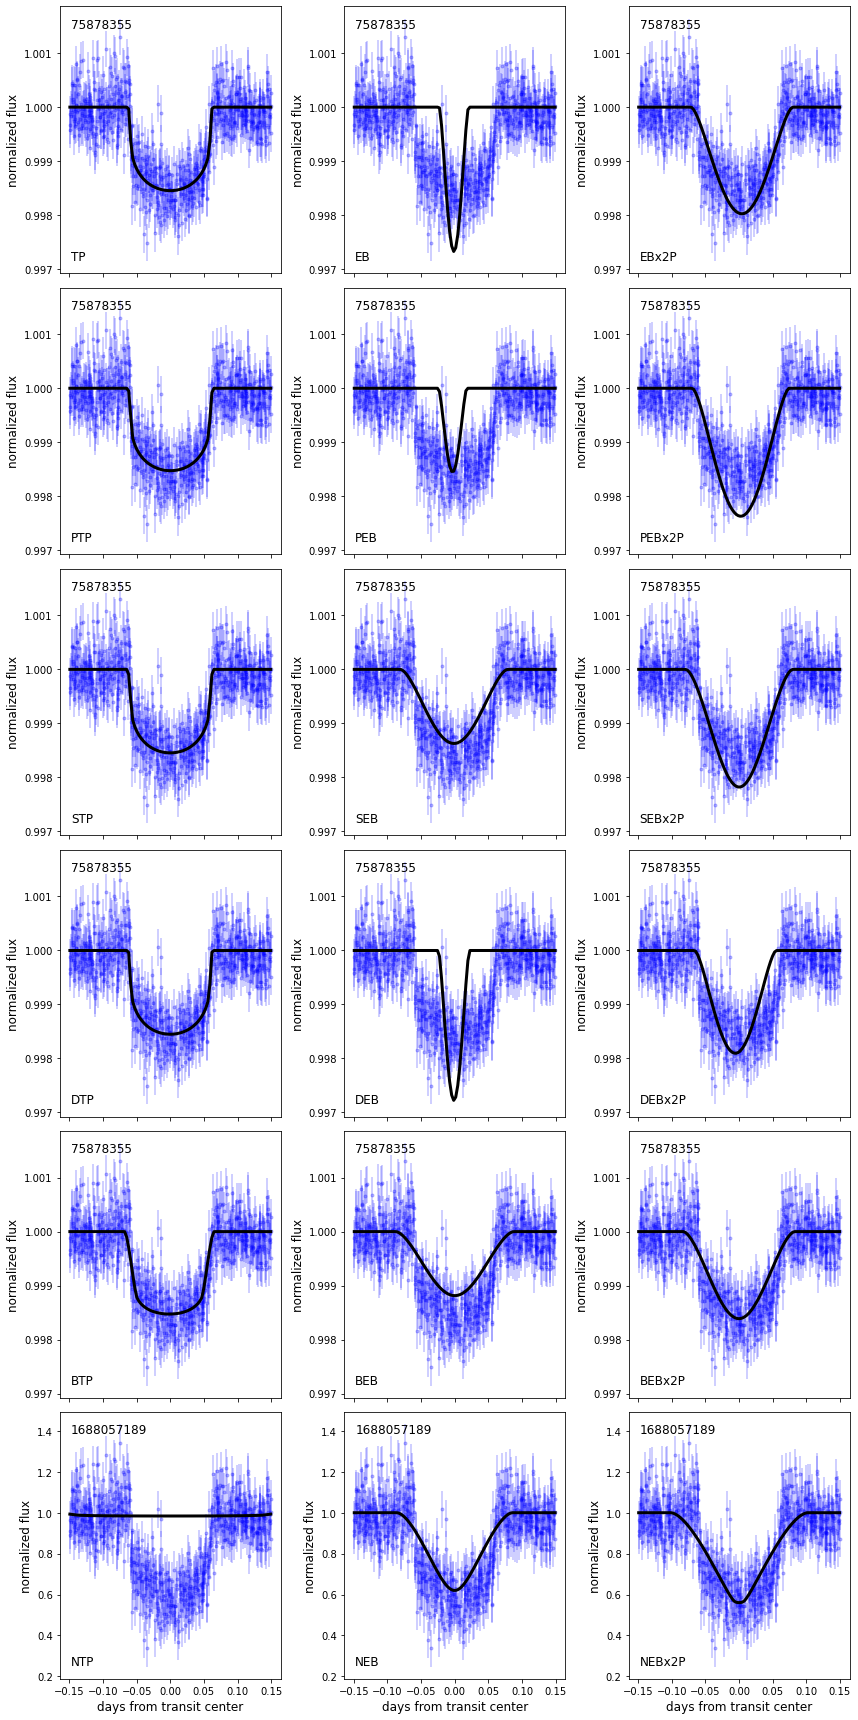

In [13]:
target.plot_fits(time=time, flux_0=flux, flux_err_0=np.mean(flux_err))